In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.ar_model import AutoReg


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('D:sales-data.csv', header = None)
data.columns = ['Month','Sales']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m-%d')
data = data.set_index('Month')
data.head()

,Sales
Month,
1980-01-01,154
1980-02-01,96
1980-03-01,73
1980-04-01,49
1980-05-01,36


In [3]:
data.describe()

,Sales
count,77.000000
mean,299.818182
std,197.708300
min,36.000000
25%,154.000000
50%,257.000000
75%,392.000000
max,895.000000


In [4]:
data.shape

(77, 1)

In [5]:
#Plot time series data

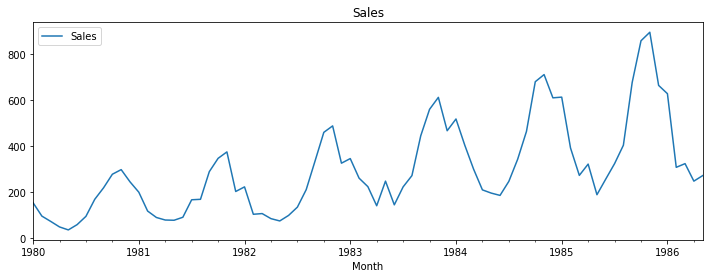

In [6]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=False)

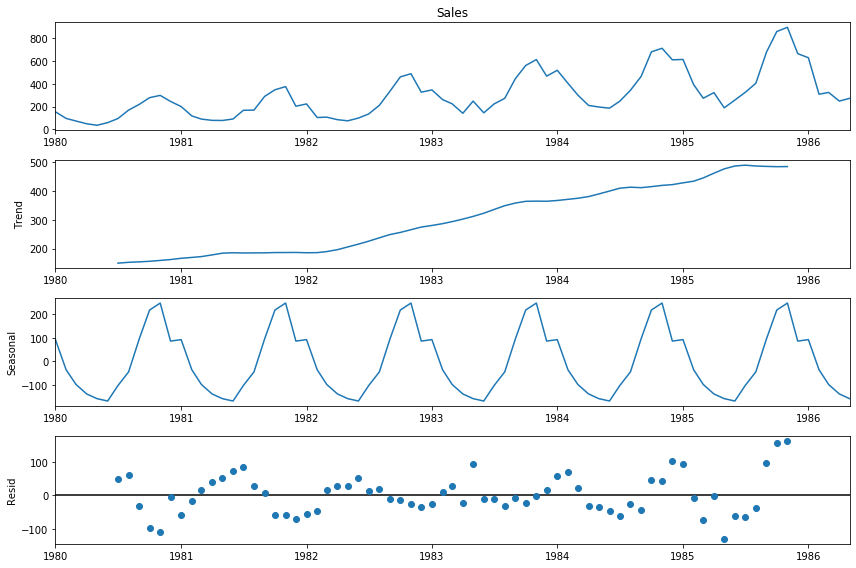

In [7]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

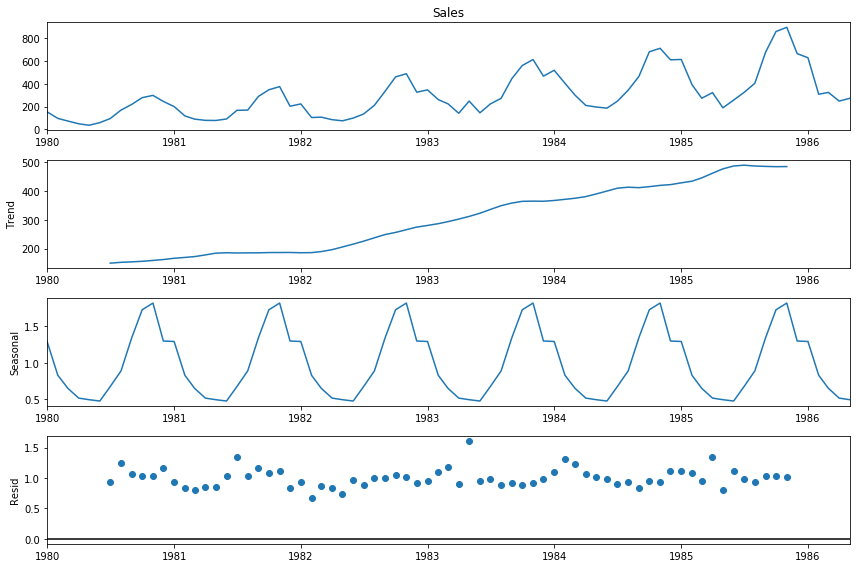

In [8]:
decomposition = sm.tsa.seasonal_decompose(data.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [9]:
#Split time series data into training and test set

In [10]:
train_len = 60
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [11]:
#Auto Regressive methods

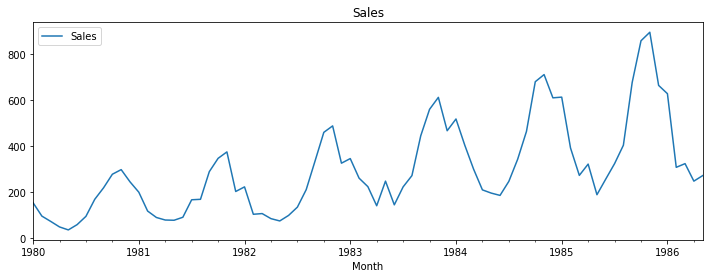

In [12]:
data['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=False)

In [13]:
### Augmented Dickey-Fuller (ADF) test

In [14]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.581906
Critical Values @ 0.05: -2.91
p-value: 0.987161


In [15]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.657628
Critical Values @ 0.05: 0.46
p-value: 0.017397


In [16]:
#Box Cox transformation to make variance constant

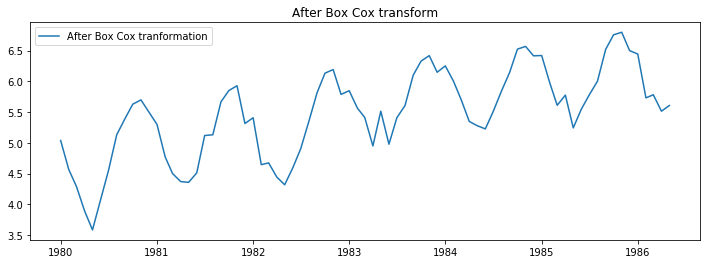

In [17]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [18]:
#Differencing to remove trend

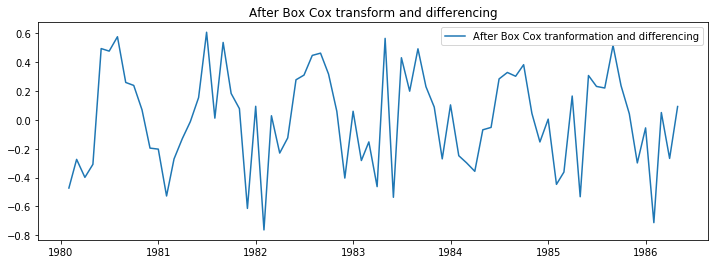

In [19]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [20]:
data_boxcox_diff.dropna(inplace=True)

In [21]:
data_boxcox_diff.tail()

Month
1986-01-01   -0.055742
1986-02-01   -0.712440
1986-03-01    0.050644
1986-04-01   -0.267315
1986-05-01    0.092373
dtype: float64

In [22]:
#Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [23]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.225247
Critical Values @ 0.05: 0.46
p-value: 0.100000


In [24]:
#Autocorrelation function (ACF)

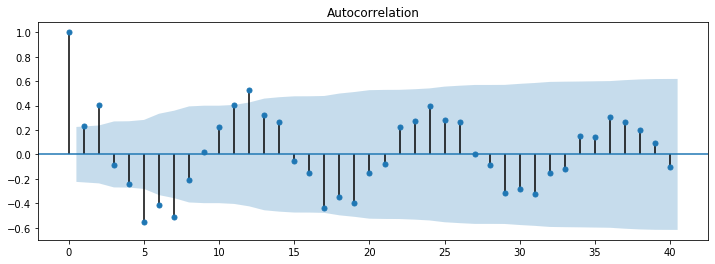

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 40)
plt.show()

In [26]:
#Partial autocorrelation function (PACF)

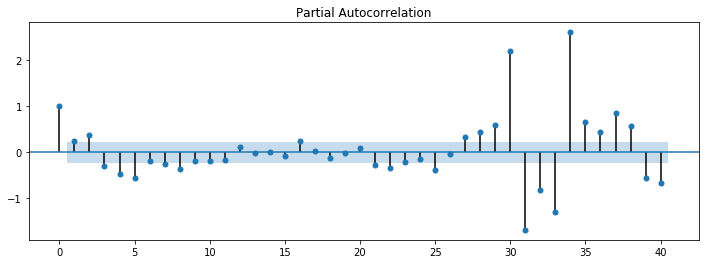

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 40)
plt.show()

In [28]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [29]:
train_data_boxcox_diff

Month
1980-02-01   -0.472604
1980-03-01   -0.273889
1980-04-01   -0.398639
1980-05-01   -0.308301
1980-06-01    0.494019
1980-07-01    0.476339
1980-08-01    0.576022
1980-09-01    0.259173
1980-10-01    0.238549
1980-11-01    0.069472
1980-12-01   -0.195835
1981-01-01   -0.202941
1981-02-01   -0.527633
1981-03-01   -0.270875
1981-04-01   -0.130362
1981-05-01   -0.012739
1981-06-01    0.154151
1981-07-01    0.607134
1981-08-01    0.011905
1981-09-01    0.536528
1981-10-01    0.182898
1981-11-01    0.077601
1981-12-01   -0.613720
1982-01-01    0.093966
1982-02-01   -0.762781
1982-03-01    0.028438
1982-04-01   -0.230178
1982-05-01   -0.125163
1982-06-01    0.277632
1982-07-01    0.310155
1982-08-01    0.446583
1982-09-01    0.462272
1982-10-01    0.317096
1982-11-01    0.059089
1982-12-01   -0.403418
1983-01-01    0.059541
1983-02-01   -0.281918
1983-03-01   -0.152874
1983-04-01   -0.462886
1983-05-01    0.564669
1983-06-01   -0.536695
1983-07-01    0.430438
1983-08-01    0.198630
1983-

In [30]:
#Auto regression method (AR)

In [34]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(4, 0, 3)) 
model_fit = model.fit()
print(model_fit.params)

const      0.019246
ar.L1.y    0.255979
ar.L2.y    1.093493
ar.L3.y   -0.641205
ar.L4.y   -0.481950
ma.L1.y   -0.807354
ma.L2.y   -0.767989
ma.L3.y    0.982087
dtype: float64


In [35]:
#Recover original time series

In [36]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

In [37]:
### Plot train, test and forecast

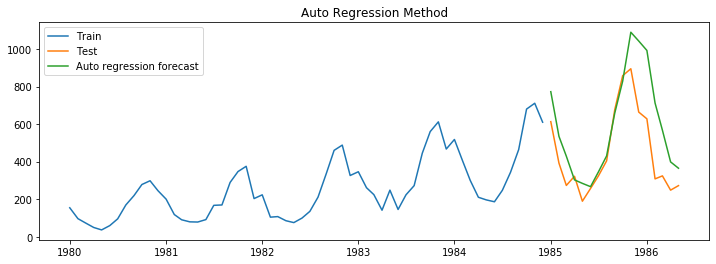

In [38]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [39]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
#print('Test RMSE: %.3f' % rmse)
tempResults

NameError: name 'mean_squared_error' is not defined

In [40]:
#Seasonal auto regressive integrated moving average (SARIMA)

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(7,2,9), seasonal_order=(3,1,1,12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -1.233399
ar.L2      -0.726999
ar.L3      -0.125018
ar.L4      -0.130273
ar.L5      -0.553309
ar.L6      -0.704588
ar.L7      -0.381273
ma.L1      -0.249673
ma.L2      -0.506154
ma.L3      -0.312090
ma.L4       0.325944
ma.L5       0.184457
ma.L6      -0.256777
ma.L7      -0.630173
ma.L8      -0.247035
ma.L9       0.706715
ar.S.L12   -0.413478
ar.S.L24   -0.247298
ar.S.L36   -0.659188
ma.S.L12   -0.232677
sigma2      0.017294
dtype: float64


In [42]:
#Recover original time series forecast

In [43]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

In [44]:
#Plot train, test and forecast

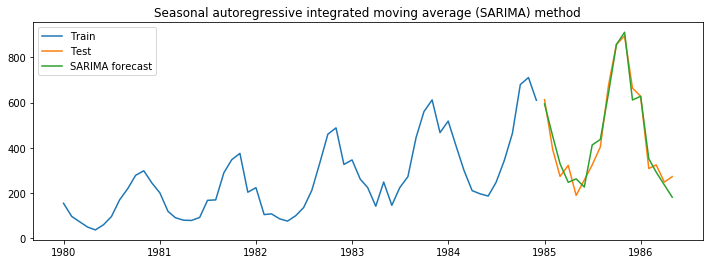

In [45]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [48]:
#Calculate RMSE and MAPE

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results
tempResults

,Method,RMSE,MAPE
0,Seasonal autoregressive integrated moving aver...,50.52,13.27
